<a href="https://colab.research.google.com/github/PadmaJyothi-U/FML/blob/main/Univariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
#Load the data
data = pd.read_csv("boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#Create feature and target array from such given data
X = data.drop('medv', axis=1).values
y = data['medv'].values

In [ ]:
#Predicting house value from a single feature (No.of rooms)
X_rooms = X[:, 5]

In [ ]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_rooms.shape, y.shape

((506,), (506,))

In [ ]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1, 1)

In [ ]:
X_rooms.shape, y.shape

((506, 1), (506, 1))

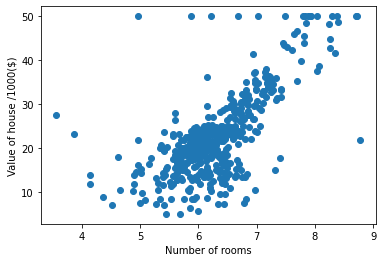

In [ ]:
#plotting house value vs. no.of rooms
plt.scatter(X_rooms, y)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000($)')
plt.show()

In [ ]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

In [ ]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_rooms)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 4.4477729015322325
MSE = 43.60055177116956
RMSE = 6.603071389222561
R_2 = 0.48352545599133423


In [ ]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

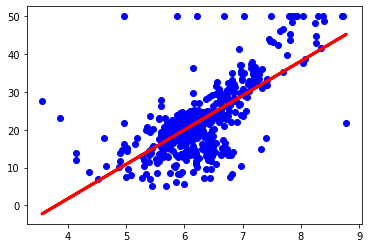

In [ ]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.show()

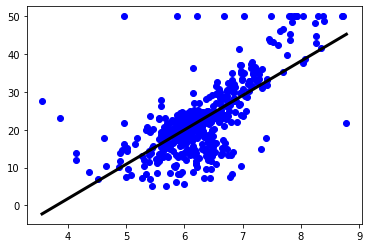

In [ ]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = [10,20,30,40,50,60,70,80,90,100]
y = [0,0,1,1,0,0,1,1,0,1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(f'Train-X = {X_train} \nTrain-y = {y_train}')
print(f'Test-X = {X_test} \nTest-y = {y_test}')

Train-X = [50, 10, 40, 20, 80, 90, 60] 
Train-y = [0, 0, 1, 0, 1, 0, 0]
Test-X = [30, 100, 70] 
Test-y = [1, 1, 1]
